In [13]:
import requests
import pandas as pd
import numpy as np

Link para solicitar token: https://www.banxico.org.mx/SieAPIRest/service/v1/token

In [19]:
token = '8ffecdc086d33fe006072c68d092316481e486cf476af47c8831437061f707c6'

In [75]:
def descargar_serie(serie, fechainicio, fechafin, token):
  url = 'http://www.banxico.org.mx/SieAPIRest/service/v1/series/'+serie+'/datos/'+fechainicio+'/'+fechafin
  print(url)
  headers = {'Bmx-Token':token}
  response = requests.get(url, headers=headers)
  status = response.status_code
  if status != 200:
    return print('Error en la consulta, codigo {}'.format(status))
  raw_data = response.json()
  data = raw_data['bmx']['series'][0]['datos']
  df = pd.DataFrame(data)
  df['dato'] = df['dato'].astype('float')
  df['fecha'] = pd.to_datetime(df['fecha'], format = '%d/%m/%Y')
  df.set_index('fecha', inplace=True)
  return df


## Titulo: Tipo de cambio pesos por dólar E.U.A

Serie: SF60653

Periocidad: Diaria

In [76]:
CAMBIO_PESO_DOLAR_DIARIO = descargar_serie('SF60653','1995-04-04', '2024-12-10', token)

http://www.banxico.org.mx/SieAPIRest/service/v1/series/SF60653/datos/1995-04-04/2024-12-10


In [90]:
CAMBIO_PESO_DOLAR_DIARIO.shape

(10844, 1)

## Titulo: Valor de UDIS

Serie: SP68257

Periocidad: Diaria

In [77]:
UDIS_DIARIO = descargar_serie('SP68257','1995-04-04', '2024-12-10', token)

http://www.banxico.org.mx/SieAPIRest/service/v1/series/SP68257/datos/1995-04-04/2024-12-10


In [91]:
UDIS_DIARIO.shape

(10844, 1)

<Axes: xlabel='fecha'>

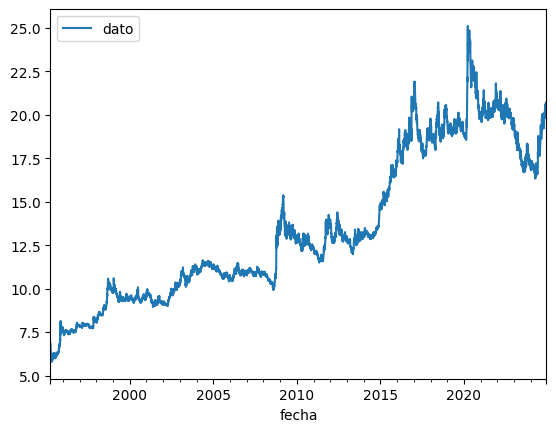

In [78]:
CAMBIO_PESO_DOLAR_DIARIO.plot(kind='line')

<Axes: xlabel='fecha'>

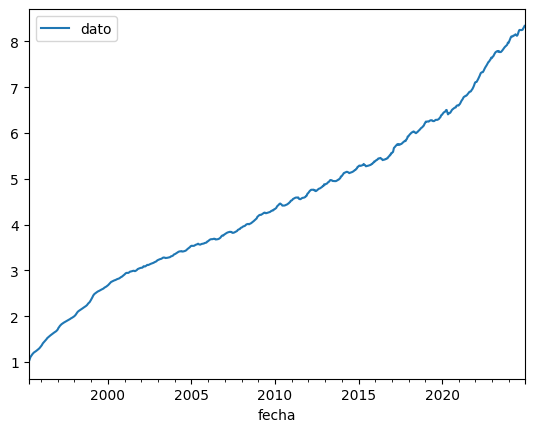

In [79]:
UDIS_DIARIO.plot(kind='line')

In [ ]:
# homogenizar el potencial peso que podria tener cada uno de nuestros datos

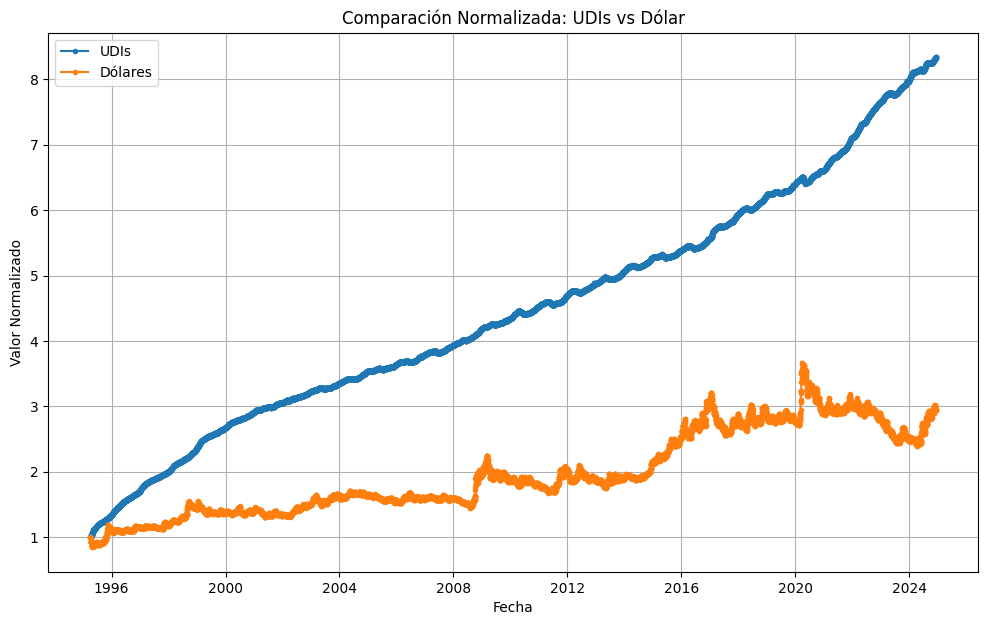

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos obtenidos de la BANXICO usando la API
fechas = UDIS_DIARIO.index.to_list()
udis = UDIS_DIARIO['dato'].to_list()
dolares = CAMBIO_PESO_DOLAR_DIARIO['dato'].to_list()

# Normalización
udis_normalizados = [x / udis[0] for x in udis]
dolares_normalizados = [x / dolares[0] for x in dolares]

# DataFrame
data = pd.DataFrame({
    'Fecha': fechas,
    'UDIs': udis_normalizados,
    'Dólares': dolares_normalizados
})

# Gráfica
plt.figure(figsize=(12, 7))
plt.plot(data['Fecha'], data['UDIs'], label='UDIs', marker='.')
plt.plot(data['Fecha'], data['Dólares'], label='Dólares', marker='.')
plt.title('Comparación Normalizada: UDIs vs Dólar')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.grid()
plt.show()
